In [2]:
# Script for multiple runs of wanderlust 
%load_ext autoreload
%autoreload 2

In [3]:
import palantir

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
# Load sample data
palantir_dir = os.path.expanduser('/share/PI/sabatti/shared_src/Palantir/')
counts = palantir.io.from_csv(palantir_dir + 'data/marrow_sample_scseq_counts.csv.gz')

In [5]:
counts.shape

(4142, 16106)

In [6]:
counts.head()

,KCTD15,STT3B,NAT6,FHL2,SP140L,DOCK9,CENPN,NEDD9,HIST1H2AM,TEK,...,ZNF543,SGTB,EEF1A1,TSPAN33,DNAJC4,SAG,FARP1,EXTL2,ZDHHC17,GOLPH3
Run4_120703408880541,0,0,0,1,0,0,0,0,0,0,...,0,0,85,0,2,0,0,0,0,0
Run4_120703409056541,0,0,0,0,0,0,0,0,0,0,...,0,0,55,0,0,0,0,0,0,0
Run4_120703409580963,0,0,0,0,0,0,0,0,0,0,...,0,0,29,0,2,0,0,0,1,1
Run4_120703423990708,0,0,0,0,0,0,0,0,0,0,...,0,0,50,0,1,0,0,0,0,0
Run4_120703436876077,0,0,1,1,1,0,0,0,0,0,...,0,0,96,0,2,0,0,0,0,0


/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


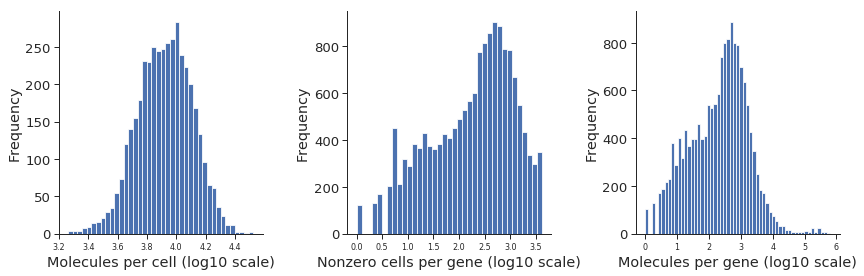

In [7]:
fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(counts)

In [8]:
norm_df = palantir.preprocess.normalize_counts(counts)
norm_df = palantir.preprocess.log_transform(norm_df)

In [9]:
pca_projections, _ = palantir.utils.run_pca(norm_df)
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

Determing nearest neighbor graph...


In [10]:
import pandas as pd
tsne = pd.read_pickle(palantir_dir + 'data/sample_tsne.p')

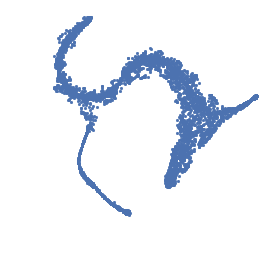

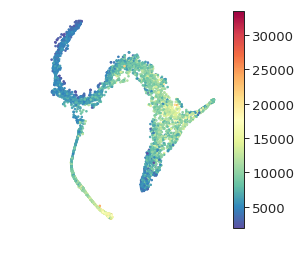

In [11]:
fig, ax = palantir.plot.plot_tsne(tsne)
fig, ax = palantir.plot.plot_tsne_by_cell_sizes(counts, tsne)

/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


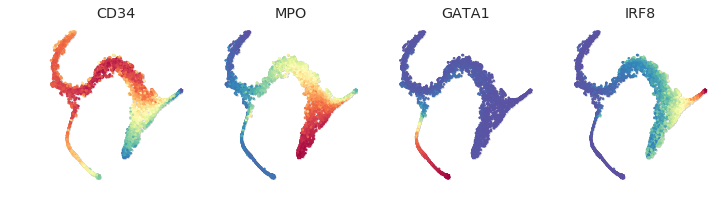

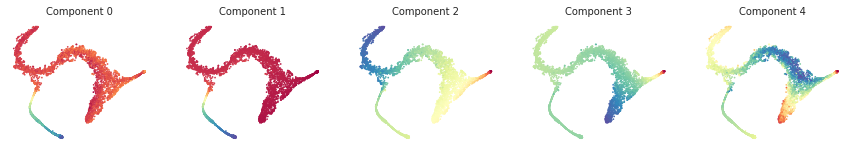

In [12]:
imp_df = palantir.utils.run_magic_imputation(norm_df, dm_res)
palantir.plot.plot_gene_expression(imp_df, tsne, ['CD34', 'MPO', 'GATA1', 'IRF8'])
palantir.plot.plot_diffusion_components(tsne, dm_res)

In [13]:
start_cell = 'Run5_164698952452459'
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.007547239462534587 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.10365644693374634 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


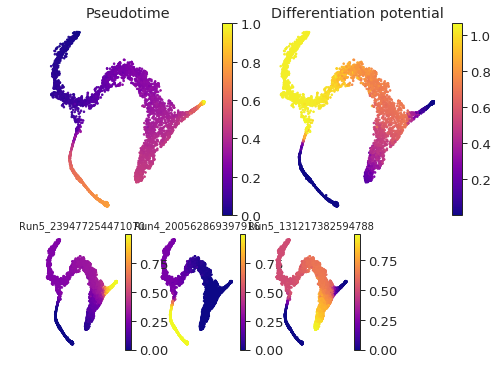

In [14]:
palantir.plot.plot_palantir_results(pr_res, tsne)

In [18]:
get._pseudotime

Run4_120703408880541    0.636968
Run4_120703409056541    0.042676
Run4_120703409580963    0.487778
Run4_120703423990708    0.462350
Run4_120703436876077    0.164375
                          ...   
Run5_241098904976174    0.230586
Run5_241106375007076    0.748805
Run5_241114577000174    0.235881
Run5_241114577004764    0.400284
Run5_241114589051630    0.778791
Length: 4142, dtype: float64